BLACK FRIDAY PREDICTION
PROJECT
Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase 
behaviour (specifically, purchase amount) against various products of different 
categories. They have shared purchase summary of various customers for selected high 
volume products from last month. The data set also contains customer demographics 
(age, gender, marital status, city_type, stay_in_current_city), product details 
(product_id and product category) and Total purchase_amount from last month.
Now, they want to build a model to predict the purchase amount of customer against 
various products which will help them to create personalized offer for customers against 
different products.
• Data
• Variable Definition
• User_ID User ID
• Product_ID Product ID
• Gender Sex of User
• Age Age in bins
• Occupation Occupation (Masked)
• City_Category Category of the City (A,B,C)
• Stay_In_Current_City_Years Number of years stay in current city
• Marital_Status Marital Status
• Product_Category_1 Product Category (Masked)
• Product_Category_2 Product may belongs to other category also (Masked)
• Product_Category_3 Product may belongs to other category also (Masked)
• Purchase Purchase Amount (Target Variable)
Steps to Follow
https://www.kaggle.com/code/spscientist/a-simple-tutorial-on-exploratory-data-analysis
https://en.wikipedia.org/wiki/Exploratory_data_analysis#:~:text=In%20statistics%2C%20
exploratory%20data%20analysis,and%20other%20data%20visualization%20methods. 
Note : Data Scientists have to apply their analytical skills to give findings and 
conclusions in detailed data analysis written in jupyter notebook . Only data analysis is 
required. 
Need not to create machine learning models /but still if anybody comes with it that is 
welcome.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Importing dataset
df=pd.read_csv("D:\\train.csv")

df=pd.read_csv("D:\\blackFriday_test1.csv")
#train = pd.read_csv('train.csv')
#test = pd.read_csv('test.csv')
df=pd.read_csv("D:\\blackFriday_train1.csv")


In [3]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


Age should be treated as a numerical column

City_Category we can convert this to a numerical column and should look at the frequency of each city category.

Gender has two values and should be converted to binary values

Product_Category_2 and Product_Category_3 have null values



# checking for null values

In [6]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

# converting Null Value in percentage


In [7]:
df.isnull().sum()/df.shape[0]*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

- There are 31% null values in the Product_Category_2 
- and 69% null values in the Product_Category_3



In [8]:
# Unique elements in each attributes
df.nunique()


User_ID                        5891
Product_ID                     3631
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               20
Product_Category_2               17
Product_Category_3               15
Purchase                      18105
dtype: int64

We can drop User_ID and Product_ID for model prediction as it has more unique values.



# EDA -EXPLORATORY DATA ANALYSIS

Target Variable Purchase


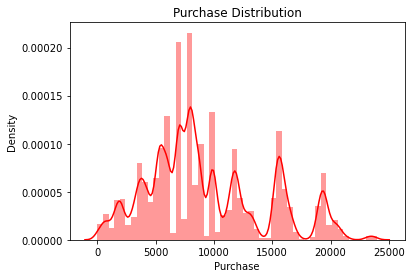

In [10]:
sns.distplot(df["Purchase"],color='r')
plt.title("Purchase Distribution")
plt.show()


We can observe that purchase amount is repeating for many customers.This may be because on Black Friday many are buying discounted products in large numbers and kind of follows a Gaussian Distribution.



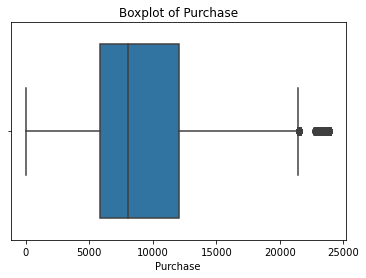

In [11]:
sns.boxplot(df["Purchase"])
plt.title("Boxplot of Purchase")
plt.show()

there are some outliers so w need to skew the data

In [13]:
df["Purchase"].skew()

0.6001400037087128

In [14]:
df["Purchase"].kurtosis()


-0.3383775655851702

In [15]:
df["Purchase"].describe()


count    550068.000000
mean       9263.968713
std        5023.065394
min          12.000000
25%        5823.000000
50%        8047.000000
75%       12054.000000
max       23961.000000
Name: Purchase, dtype: float64

The purchase is right skewed and we can observe multiple peaks in the distribution we can do a log transformation for the purchase.



# gender

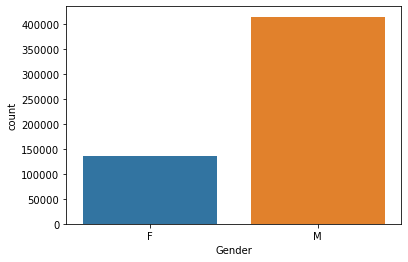

In [16]:
sns.countplot(df['Gender'])
plt.show()


In [17]:
df['Gender'].value_counts(normalize=True)*100


M    75.310507
F    24.689493
Name: Gender, dtype: float64

there are many males than the females

In [18]:
# gruping males and females 
df.groupby("Gender").mean()["Purchase"]


Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

- On average the male gender spends more money on purchase contrary to female,
- and it is possible to also observe this trend by adding the total value of purchase.



# Martial status


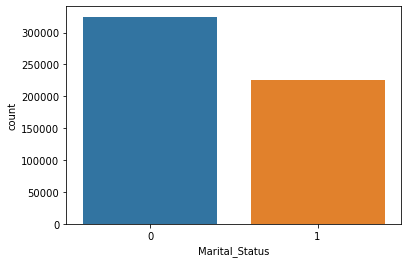

In [20]:
sns.countplot(df['Marital_Status'])
plt.show()


There are more unmarried people in the dataset who purchase more



In [21]:
df.groupby("Marital_Status").mean()["Purchase"]


Marital_Status
0    9265.907619
1    9261.174574
Name: Purchase, dtype: float64

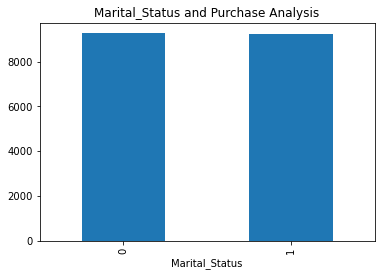

In [22]:
df.groupby("Marital_Status").mean()["Purchase"].plot(kind='bar')
plt.title("Marital_Status and Purchase Analysis")
plt.show()


observation: This is interesting though unmarried people spend more on purchasing, the average purchase amount of married and unmarried people are the same.



# Occupation


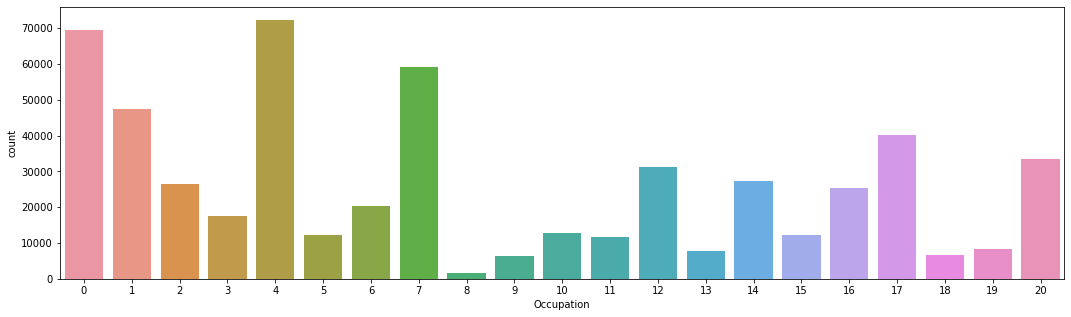

In [23]:
plt.figure(figsize=(18,5))
sns.countplot(df['Occupation'])
plt.show()


observation in Occupation : it has at least 20 different values. Since we do not known to each occupation each number corresponds, is difficult to make any analysis. Furthermore, it seems we have no alternative but to use since there is no way to reduce this number



In [24]:
occup = pd.DataFrame(df.groupby("Occupation").mean()["Purchase"])
occup


,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


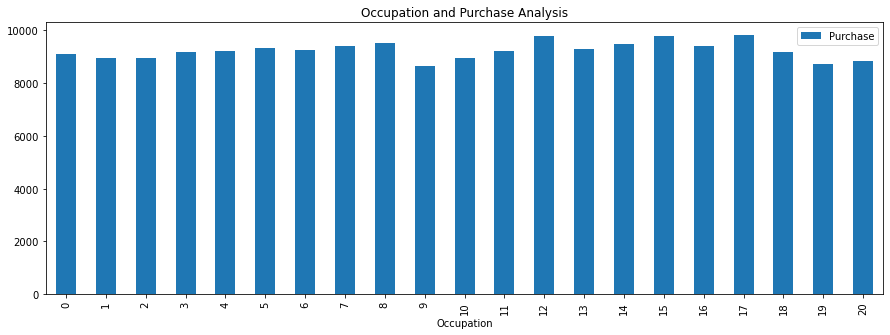

In [25]:
occup.plot(kind='bar',figsize=(15,5))
plt.title("Occupation and Purchase Analysis")
plt.show()


observation: 
    - Although there are some occupations which have higher representations, it seems that the amount each user spends on average is more or less the same for all occupations. Of course, in the end, occupations with the highest representations will have the highest amounts of purchases.



# City_Category


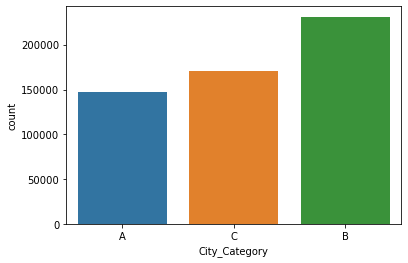

In [26]:
sns.countplot(df['City_Category'])
plt.show()


It is observed that city category B has made the most number of puchases.



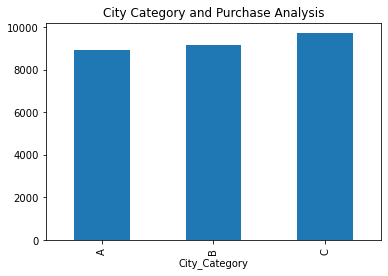

In [27]:
df.groupby("City_Category").mean()["Purchase"].plot(kind='bar')
plt.title("City Category and Purchase Analysis")
plt.show()


observation : 
- However, the city whose buyers spend the most is city type ‘C’.



# Stay_In_Current_City_Years


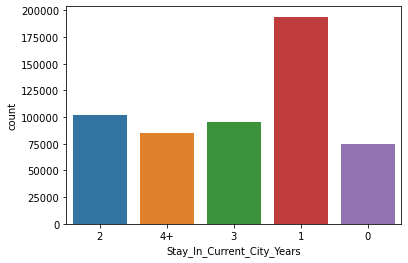

In [28]:
sns.countplot(df['Stay_In_Current_City_Years'])
plt.show()


 we observed that It looks like the longest is someone is living in that city the less prone they are to buy new things. Hence, if someone is new in town and needs a great number of new things for their house that they’ll take advantage of the low prices in Black Friday to purchase all the things needed.



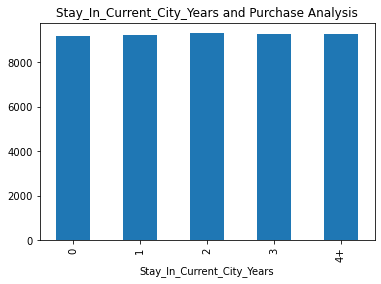

In [29]:
df.groupby("Stay_In_Current_City_Years").mean()["Purchase"].plot(kind='bar')
plt.title("Stay_In_Current_City_Years and Purchase Analysis")
plt.show()


We see the same pattern seen before which show that on average people tend to spend the same amount on purchases regardeless of their group. People who are new in city are responsible for the higher number of purchase, however looking at it individually they tend to spend the same amount independently of how many years the have lived in their current city.



# AGE

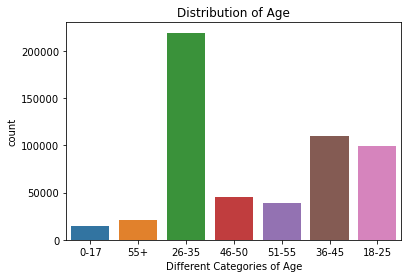

In [31]:
sns.countplot(df['Age'])
plt.title('Distribution of Age')
plt.xlabel('Different Categories of Age')
plt.show()


Age 26-35 Age group makes the most no of purchases in the age group.



<AxesSubplot:xlabel='Age'>

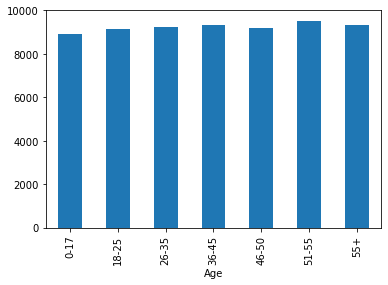

In [32]:
df.groupby("Age").mean()["Purchase"].plot(kind='bar')


Mean puchase rate between the age groups tends to be the same except that the 51-55 age group has a little higher average purchase amount



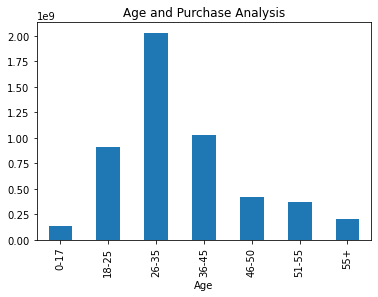

In [33]:
df.groupby("Age").sum()['Purchase'].plot(kind="bar")
plt.title("Age and Purchase Analysis")
plt.show()


Total amount spent in purchase is in accordance with the number of purchases made, distributed by age.



# Product_Category_1


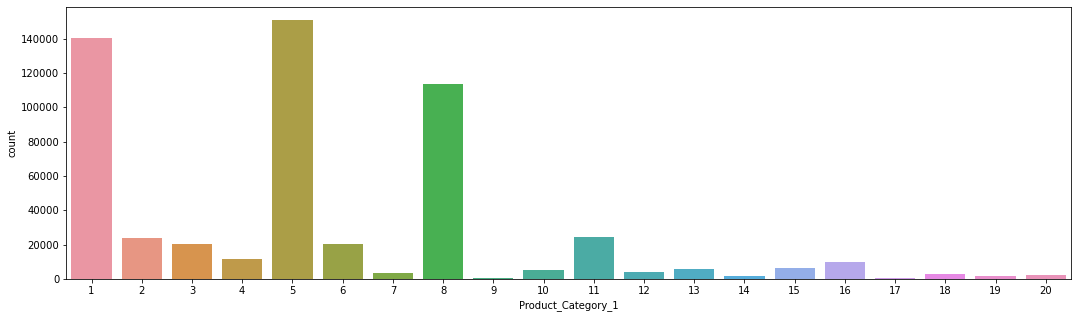

In [35]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_1'])
plt.show()

It is clear that Product_Category_1 numbers 1,5 and 8 stand out. Unfortunately we don't know which product each number represents as it is masked.



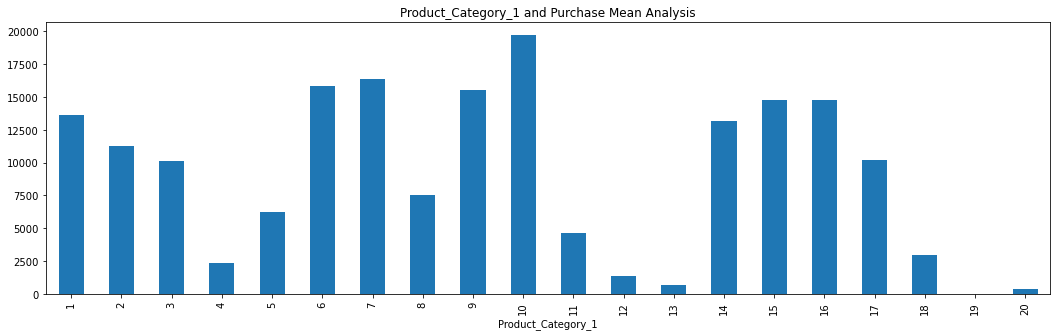

In [36]:
df.groupby('Product_Category_1').mean()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Mean Analysis")
plt.show()

If you see the value spent on average for Product_Category_1 you see that although there were more products bought for categories 1,5,8 the average amount spent for those three is not the highest. It is interesting to see other categories appearing with high purchase values despite having low impact on sales number.



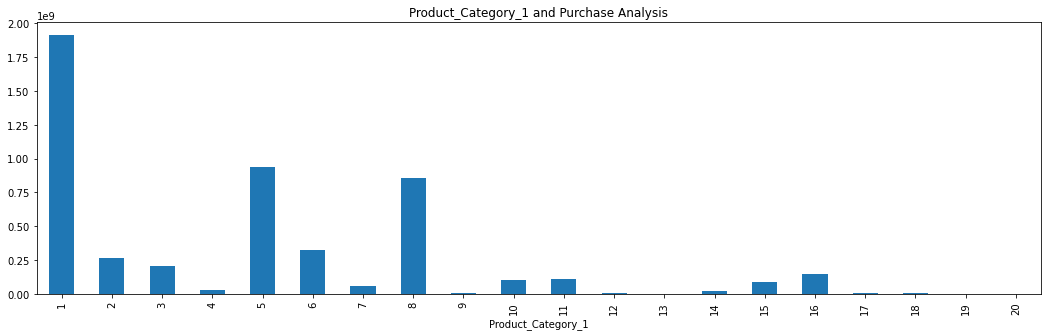

In [37]:
df.groupby('Product_Category_1').sum()['Purchase'].plot(kind='bar',figsize=(18,5))
plt.title("Product_Category_1 and Purchase Analysis")
plt.show()


The distribution that we saw for this predictor previously appears here. For example, those three products have the highest sum of sales since their were three most sold products.



# Product_Category_2


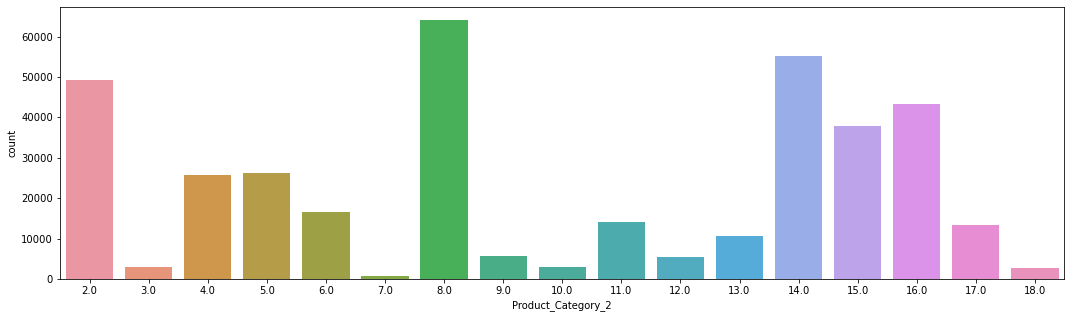

In [38]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_2'])
plt.show()


# Product_Category_3


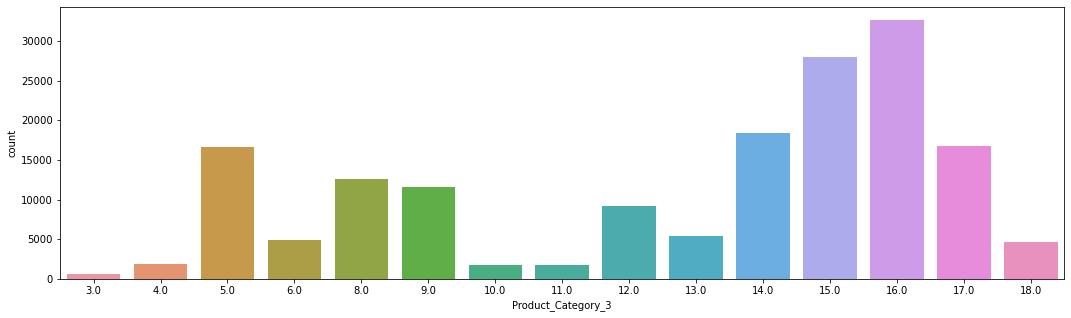

In [40]:
plt.figure(figsize=(18,5))
sns.countplot(df['Product_Category_3'])
plt.show()


In [41]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.001529,0.003419,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,-0.000384,0.013263,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.015138,0.019473,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,0.540583,0.229678,-0.343703
Product_Category_2,0.001529,-0.000384,0.015138,0.540583,1.000000,0.543649,-0.209918
Product_Category_3,0.003419,0.013263,0.019473,0.229678,0.543649,1.000000,-0.022006
Purchase,0.004716,0.020833,-0.000463,-0.343703,-0.209918,-0.022006,1.000000


# HEAT MAP

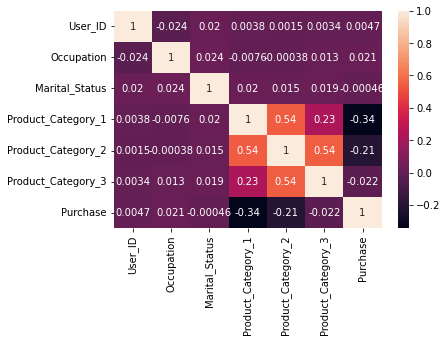

In [42]:
sns.heatmap(df.corr(),annot=True)
plt.show()


There is a some corellation between the product category groups.



In [43]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [44]:
dff=df.copy()

In [45]:
dff.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [46]:
#Dummy Variables:
dff = pd.get_dummies(dff, columns=['Stay_In_Current_City_Years'])


Encoding the categorical variables


In [47]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()


In [48]:
dff['Gender'] = lr.fit_transform(dff['Gender'])


In [49]:
dff['Age'] = lr.fit_transform(dff['Age'])

In [50]:
dff['City_Category'] = lr.fit_transform(dff['City_Category'])


In [51]:
dff.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4+
0,1000001,P00069042,0,0,10,0,0,3,NaN,NaN,8370,0,0,1,0,0
1,1000001,P00248942,0,0,10,0,0,1,6.0,14.0,15200,0,0,1,0,0
2,1000001,P00087842,0,0,10,0,0,12,NaN,NaN,1422,0,0,1,0,0
3,1000001,P00085442,0,0,10,0,0,12,14.0,NaN,1057,0,0,1,0,0
4,1000002,P00285442,1,6,16,2,0,8,NaN,NaN,7969,0,0,0,0,1


In [52]:
dff['Product_Category_2'] =dff['Product_Category_2'].fillna(0).astype('int64')
dff['Product_Category_3'] =dff['Product_Category_3'].fillna(0).astype('int64')


In [53]:
dff.isnull().sum()

User_ID                          0
Product_ID                       0
Gender                           0
Age                              0
Occupation                       0
City_Category                    0
Marital_Status                   0
Product_Category_1               0
Product_Category_2               0
Product_Category_3               0
Purchase                         0
Stay_In_Current_City_Years_0     0
Stay_In_Current_City_Years_1     0
Stay_In_Current_City_Years_2     0
Stay_In_Current_City_Years_3     0
Stay_In_Current_City_Years_4+    0
dtype: int64

In [54]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   User_ID                        550068 non-null  int64 
 1   Product_ID                     550068 non-null  object
 2   Gender                         550068 non-null  int32 
 3   Age                            550068 non-null  int32 
 4   Occupation                     550068 non-null  int64 
 5   City_Category                  550068 non-null  int32 
 6   Marital_Status                 550068 non-null  int64 
 7   Product_Category_1             550068 non-null  int64 
 8   Product_Category_2             550068 non-null  int64 
 9   Product_Category_3             550068 non-null  int64 
 10  Purchase                       550068 non-null  int64 
 11  Stay_In_Current_City_Years_0   550068 non-null  uint8 
 12  Stay_In_Current_City_Years_1   550068 non-nu

Dropping the irrelevant columns


In [56]:
dff = dff.drop(["User_ID","Product_ID"],axis=1)


Splitting data into independent and dependent variables


In [57]:
x= dff.drop("Purchase",axis=1)

In [58]:
y=dff['Purchase']

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=123)


Modeling
- Linear Regression



In [61]:
from sklearn.linear_model import LinearRegression


In [62]:
lr = LinearRegression()
lr.fit(X_train,y_train)


LinearRegression()

In [63]:
lr.intercept_


9536.4007641316

In [64]:
lr.coef_


array([ 465.82318446,  112.36643445,    5.05508596,  314.06766138,
        -58.23217776, -348.4514785 ,   12.98415047,  143.49190467,
        -20.83796687,    5.4676518 ,   17.68367185,   -3.96751734,
          1.65416056])

In [65]:
y_pred = lr.predict(X_test)


In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


In [67]:
# calculate mae
mean_absolute_error(y_test, y_pred)


3532.069226165843

In [68]:
# calculate mse
mean_squared_error(y_test, y_pred)


21397853.26940751

In [69]:
r2_score(y_test, y_pred)


0.15192944521481688

In [70]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, y_pred)))


RMSE of Linear Regression Model is  4625.781368526566


DecisionTreeRegressor


In [71]:
from sklearn.tree import DecisionTreeRegressor

# create a regressor object 
regressor = DecisionTreeRegressor(random_state = 0)  


In [72]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [73]:
dt_y_pred = regressor.predict(X_test)


In [74]:
mean_absolute_error(y_test, dt_y_pred)


2372.0357559134654

In [76]:
mean_squared_error(y_test, dt_y_pred)


11300579.466797074

In [77]:
r2_score(y_test, dt_y_pred)


0.5521191505924365

In [78]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))


RMSE of Linear Regression Model is  3361.633452177241


# Random Forest Regressor


In [79]:
from sklearn.ensemble import RandomForestRegressor

# create a regressor object 
RFregressor = RandomForestRegressor(random_state = 0)  


In [80]:
RFregressor.fit(X_train, y_train)


RandomForestRegressor(random_state=0)

In [81]:
rf_y_pred = RFregressor.predict(X_test)


In [83]:
mean_absolute_error(y_test, rf_y_pred)


2222.049109204734

In [84]:
mean_squared_error(y_test, rf_y_pred)


9310769.87311957

In [85]:
r2_score(y_test, rf_y_pred)


0.6309821516972987

In [86]:
from math import sqrt
print("RMSE of Linear Regression Model is ",sqrt(mean_squared_error(y_test, rf_y_pred)))


RMSE of Linear Regression Model is  3051.35541573242


 Model Evaluation


In [102]:
print("Linear Regression: ")
print("RMSE of the Model is ",sqrt(mean_squared_error(y_test, y_pred)))

print("R2 score :",r2_score(y_test, y_pred))


Linear Regression: 
RMSE of the Model is  4625.781368526566
R2 score : 0.15192944521481688


In [104]:
print("Decision tree Regression:")
print("RMSE of the Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))
print("R2 Score :",r2_score(y_test, dt_y_pred))


Decision tree Regression:
RMSE of the Model is  3361.633452177241
R2 Score : 0.5521191505924365


In [105]:
print("Random Forest Regression:")
print("RMSE  is:  ",sqrt(mean_squared_error(y_test, rf_y_pred)))

#print("RMSE of the Model is ",sqrt(mean_squared_error(y_test, dt_y_pred)))
print("R2 Score :",r2_score(y_test, rf_y_pred))


Random Forest Regression:
RMSE  is:   3051.35541573242
R2 Score : 0.6309821516972987


In [ ]:
from this three model random forest regression is best still we need to try on knn,and xgb to decide best
eda is completed as per project assigned.